<ipython-input-13-d7a3d16c80f5>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_rng = pd.date_range(start='1/1/2020', end='12/31/2023', freq='M')


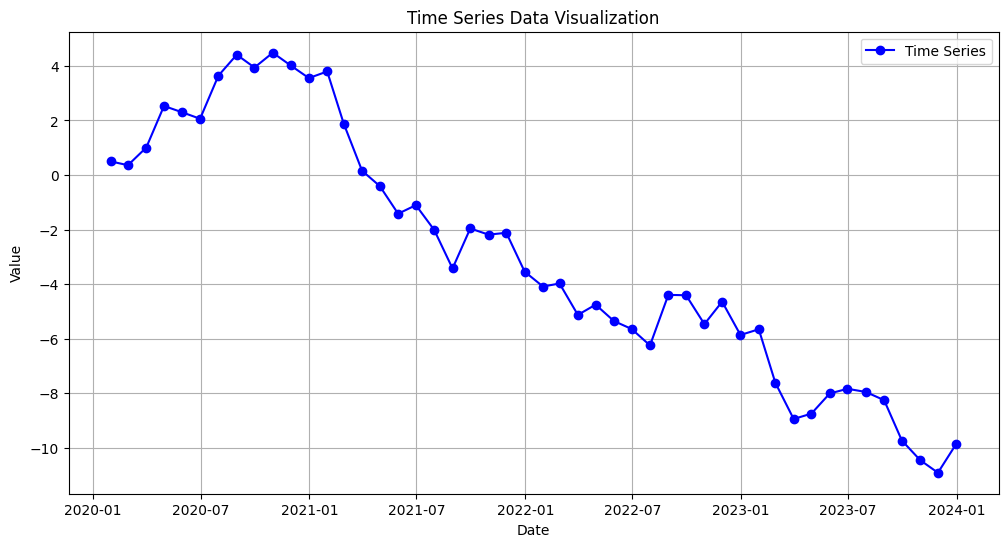

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)
date_rng = pd.date_range(start='1/1/2020', end='12/31/2023', freq='M')
data = np.random.randn(len(date_rng)).cumsum()

df = pd.DataFrame(data, index=date_rng, columns=['Value'])

plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Value'], marker='o', linestyle='-', color='b', label="Time Series")
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Time Series Data Visualization")
plt.legend()
plt.grid()
plt.show()


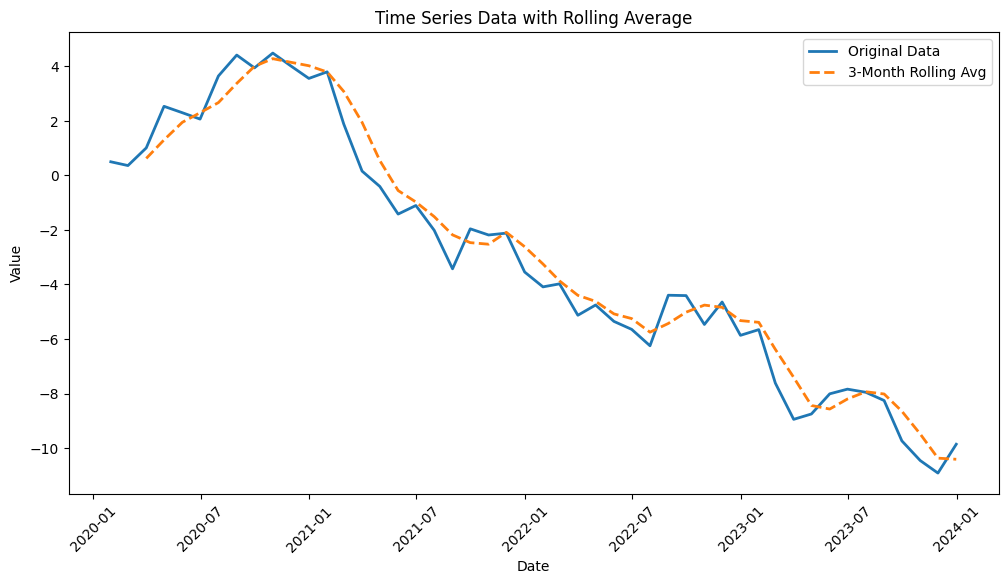

In [ ]:
import seaborn as sns

df['Rolling Mean'] = df['Value'].rolling(window=3).mean()
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=df.index, y="Value", label="Original Data", linewidth=2)
sns.lineplot(data=df, x=df.index, y="Rolling Mean", label="3-Month Rolling Avg", linewidth=2, linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Time Series Data with Rolling Average")
plt.xticks(rotation=45)
plt.legend()
plt.show()



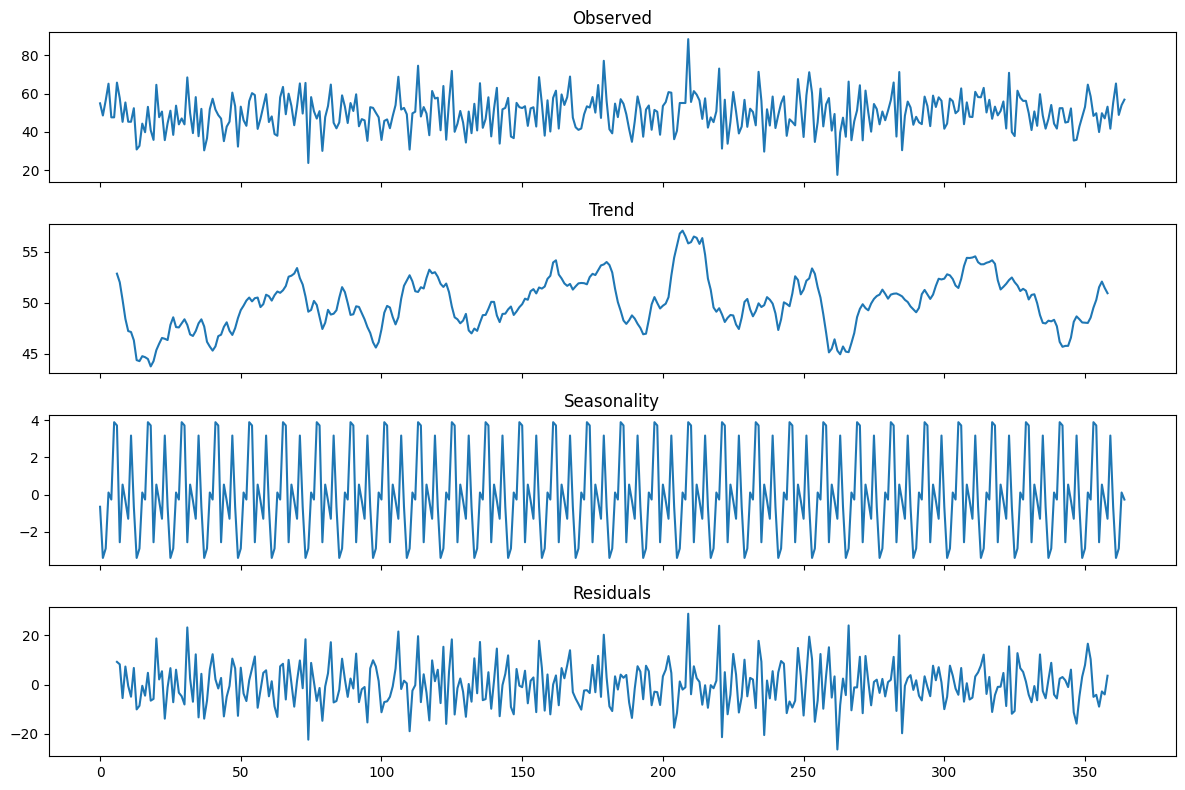

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['Value'], model='additive', period=12)

fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharex=True)
result.observed.plot(ax=axes[0], title='Observed')
result.trend.plot(ax=axes[1], title='Trend')
result.seasonal.plot(ax=axes[2], title='Seasonality')
result.resid.plot(ax=axes[3], title='Residuals')
plt.tight_layout()
plt.show()


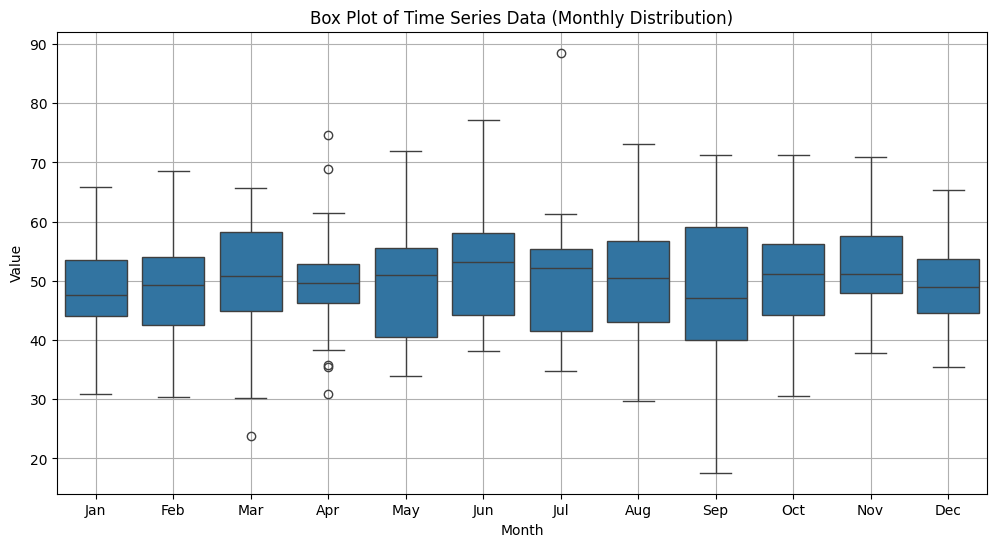

In [ ]:
np.random.seed(42)
date_range = pd.date_range(start='2023-01-01', periods=365, freq='D')
data = np.random.normal(loc=50, scale=10, size=len(date_range))


df = pd.DataFrame({'Date': date_range, 'Value': data})

df['Month'] = df['Date'].dt.strftime('%b')

plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Value', data=df, order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                                                  'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.title('Box Plot of Time Series Data (Monthly Distribution)')
plt.xlabel('Month')
plt.ylabel('Value')
plt.grid(True)
plt.show()